In [10]:
%cd /Users/govindrnair/TheoNeuroLab/GridCellsCond

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ratinabox import Agent
from ratinabox import Environment
from tqdm import tqdm
from param import Param
from scipy import integrate, stats
import sim_utils as s_utils
import analysis_utils as a_utils
from network_configs.instrumentations.trajectory1D import Trajectory1D

/Users/govindrnair/TheoNeuroLab/GridCellsCond


In [11]:
#generate trajectory

seed = 68
np.random.seed(seed)
sim_id='VALD-PI-TRAJ-S-m-1a_no_theta'
sim_num=0
sim_dur = float(30000)
params = s_utils.load_sim_params(sim_id)["0"]
lambda_0 = params["lambda0"]
traj = Trajectory1D(params,save_mem=False)
n_trials=10
decoded_postions = np.zeros((n_trials,int(params["sim_dur"]-traj.init_allothetic_dur)))
sim_num=0

sim_dur_s=30
sim_dur_s_init = 8 #initial allothetic trajectory duration
allothetic_dur=sim_dur_s_init*1000


In [12]:
def circular_error(var1,var2):

    """Calculate the circular error between two angles.

    Parameters:
        var1 (float or array-like): The first angle in radians.
        var2 (float or array-like): The second angle in radians.
    Returns:
        numpy.ndarray: The minimum absolute difference between the angles
    """
    circum = 2*np.pi
    return np.abs(np.min(np.vstack((np.abs(var1-var2),circum-np.abs(var1-var2))),axis=0))

In [13]:
Env = Environment(
        params = {'dimensionality':'1D',
                'boundary_conditions':'periodic','scale':lambda_0/100})

#generate allothetic trajectory for 8s (fixed position)
Ag= Agent(Env,
        params = {'dt':0.000025,'speed_mean':0,'speed_std':0}) #0.000025 
Ag.pos=[0]
for i in tqdm(range(int((sim_dur_s_init/Ag.dt)+1))): 
        Ag.update()

#generate rest of the trajectory
Ag.speed_mean= 0.08
Ag.speed_std=0.08
sim_dur_s_traj = sim_dur_s-sim_dur_s_init
for i in tqdm(range(int((sim_dur_s_traj/Ag.dt)+1))): 
        Ag.update()


100%|██████████| 880001/880001 [01:06<00:00, 13221.97it/s]


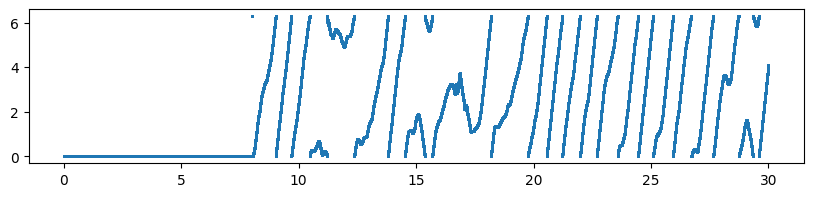

In [14]:
t=np.array(Ag.history['t'])*1000 #s->ms
pos=np.array(Ag.history['pos'])*100 #m-->cm
vel=np.array(Ag.history['vel']).ravel()/10 #m/s --> cm/ms
traj_start_idx = int((sim_dur_s_init)/0.000025)
t=t/1000 #ms-->s
vel=vel*1000
vel[abs(vel)>10]=10 #pin the velocity to 10 since network saturates around 10 rad/s
pos_integrated=integrate.cumulative_trapezoid(vel,t)%(2*np.pi)
plt.figure(figsize=(10,2))
plt.scatter(t[:-1],pos_integrated,s=0.5)
plt.show()


#### Modifying Theta Oscillations

We place a "cue" at some position on the track. As the rat approaches the cue, the theta oscillations come down in amplitude. 

